In [1]:
# Data Pre-Processing

# Handling missing values

In [2]:
import numpy as np
import pandas as pd


/home/prayash/.local/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
# read data from csv
data = pd.read_csv('Dataset.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2023 entries, 0 to 2022
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Customer ID     2023 non-null   int64  
 1   Age             2008 non-null   float64
 2   Gender          2008 non-null   object 
 3   Item Purchased  2023 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 63.3+ KB


In [5]:
import numpy as np

In [6]:
## We see that there are missing values in Age and Gender column
data['Age']=data['Age'].fillna(data['Age'].mean()) ## filled missing data using median
data['Gender']=data['Gender'].fillna(data['Gender'].mode()[0]) ## filled categorical data using mode


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2023 entries, 0 to 2022
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Customer ID     2023 non-null   int64  
 1   Age             2023 non-null   float64
 2   Gender          2023 non-null   object 
 3   Item Purchased  2023 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 63.3+ KB


In [8]:
## remove duplicates
data_removed_duplicates = data.drop_duplicates()

In [9]:
data_removed_duplicates.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 0 to 2002
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Customer ID     2000 non-null   int64  
 1   Age             2000 non-null   float64
 2   Gender          2000 non-null   object 
 3   Item Purchased  2000 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 78.1+ KB


In [10]:
bins = [0, 18, 30, 50, 65, 100]
labels = ['0-18', '19-30', '31-50', '51-65', '66+']
data_copy = data_removed_duplicates.copy()
data_copy['Age group']= pd.cut(data_copy['Age'], bins=bins, labels=labels, right=False)


In [11]:
data_copy

,Customer ID,Age,Gender,Item Purchased,Age group
0,1994,32.0,Male,Blouse,31-50
1,1995,33.0,Male,Sunglasses,31-50
2,1996,67.0,Male,Boots,66+
3,1997,67.0,Male,Sneakers,66+
4,1998,42.0,Male,Backpack,31-50
...,...,...,...,...,...
1998,1989,46.0,Male,Pants,31-50
1999,1990,35.0,Male,Jewelry,31-50
2000,1991,32.0,Male,Backpack,31-50
2001,1992,46.0,Male,Sneakers,31-50


In [12]:
# Purchased count
item_purchased_count = data_copy['Item Purchased'].value_counts() 

In [13]:
data_summary = data_copy['Age'].describe() # summary table

In [14]:
gender_item_purchased_dist = data_copy.groupby(['Item Purchased', 'Gender'],observed = False).size().unstack(fill_value=0)


In [15]:
item_purchased_count # Item popularity

Item Purchased
Pants         99
Sweater       94
Jewelry       94
Coat          87
Hat           86
Dress         86
Shirt         84
Hoodie        83
Skirt         82
Sneakers      82
Belt          81
Shorts        81
Backpack      80
Sunglasses    79
T-shirt       77
Jacket        77
Gloves        76
Scarf         75
Boots         75
Sandals       73
Jeans         73
Blouse        73
Shoes         70
Handbag       70
Socks         63
Name: count, dtype: int64

In [16]:
avg_age_per_item = data_copy.groupby(['Item Purchased'],observed = False)['Age'].mean() # average age per item


In [17]:
avg_age_per_item

Item Purchased
Backpack      42.112500
Belt          43.499139
Blouse        44.712329
Boots         46.706667
Coat          44.924486
Dress         45.313953
Gloves        42.315789
Handbag       46.203073
Hat           43.397850
Hoodie        44.397590
Jacket        45.184612
Jeans         42.438356
Jewelry       45.872340
Pants         43.880961
Sandals       43.139933
Scarf         45.360000
Shirt         41.835895
Shoes         44.742857
Shorts        43.185185
Skirt         46.539209
Sneakers      43.307502
Socks         45.174603
Sunglasses    46.025316
Sweater       42.727982
T-shirt       43.483313
Name: Age, dtype: float64

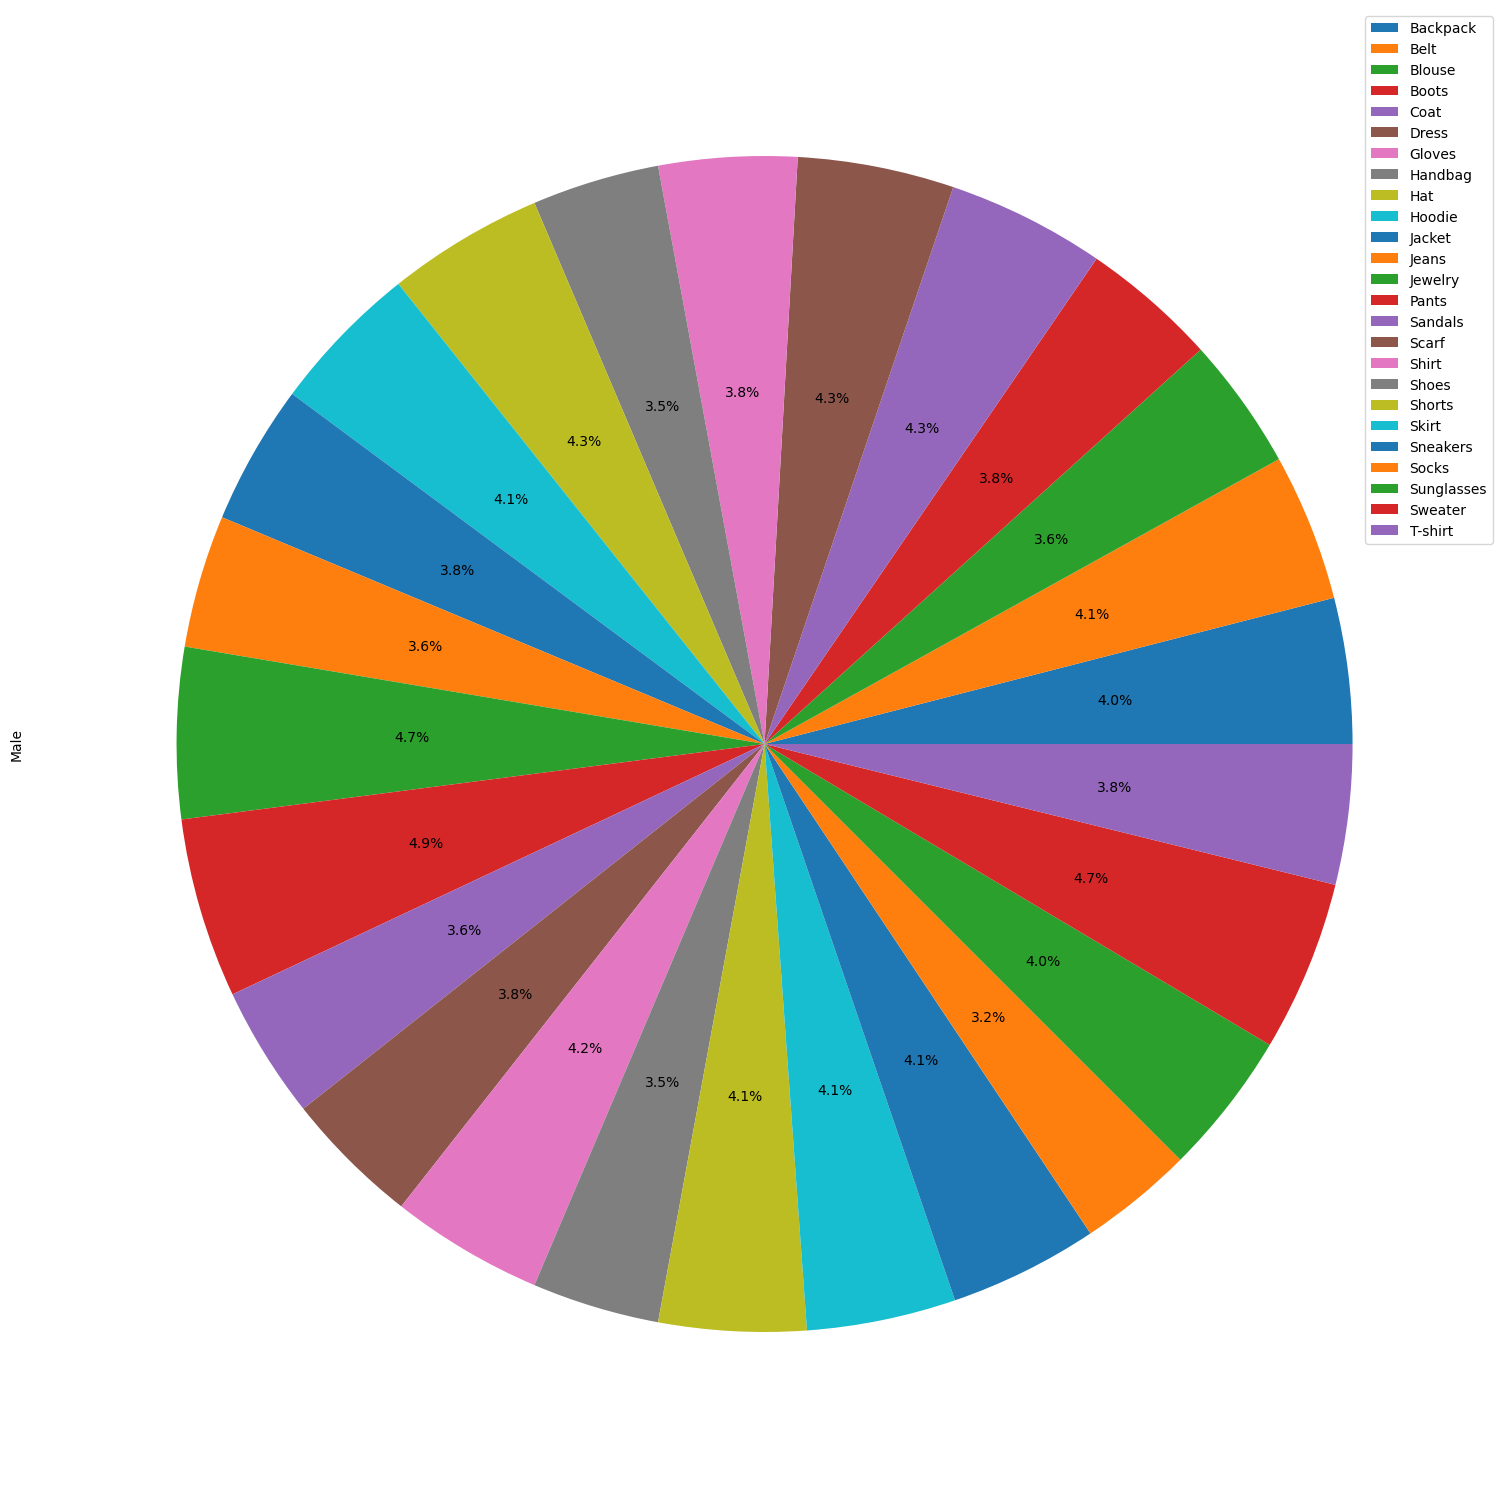

In [18]:
## Visualization
import matplotlib.pyplot as plt
# Gender distribution
ax = gender_item_purchased_dist.plot(kind="pie",y="Male",autopct='%1.1f%%',figsize=(30,15),labels=None)
ax.set_aspect('equal')
plt.tight_layout()
plt.show()

<Axes: xlabel='Item Purchased'>

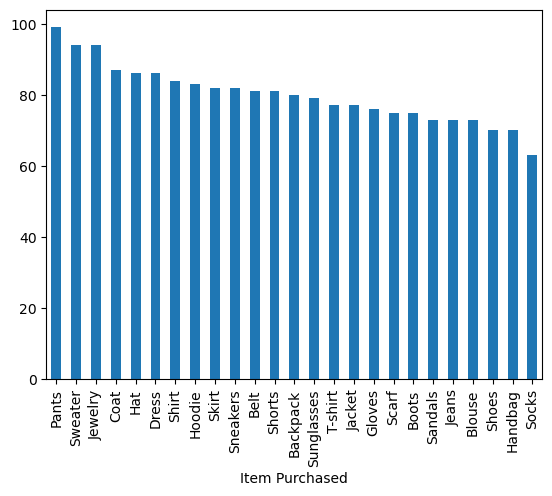

In [19]:
item_purchased_count.plot(kind="bar") # Bar chart for Purchases per item

<Axes: xlabel='Item Purchased'>

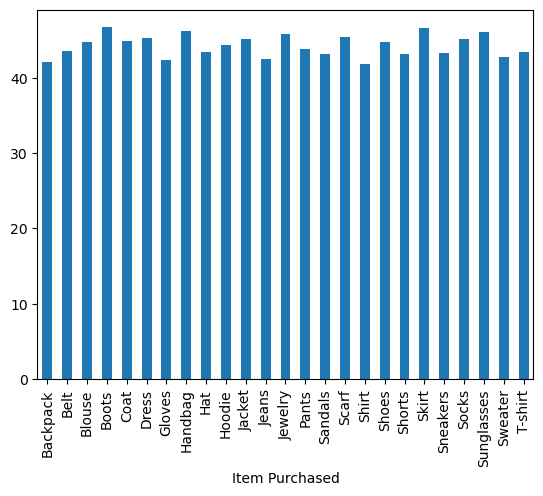

In [20]:
avg_age_per_item.plot(kind="bar")

In [22]:
data_summary

count    2000.000000
mean       44.237614
std        15.315586
min        18.000000
25%        31.000000
50%        44.215139
75%        58.000000
max        70.000000
Name: Age, dtype: float64

In [32]:
data_copy.groupby(['Age group'], observed=False)['Customer ID'].count()

Age group
0-18       0
19-30    446
31-50    741
51-65    585
66+      228
Name: Customer ID, dtype: int64